In [5]:
import pandas as pd
import re

df = pd.read_excel("annotation_agreement_results_by_author wise_final (1).xlsx")

# Convert stringified lists to actual lists
df["disciplines_merged"] = df["disciplines_merged"].apply(eval)

# Explode domains
df = df.explode("disciplines_merged")

# Normalize domains by removing trailing digits
def normalize_domain(domain):
    domain = domain.strip()
    return re.sub(r"\d+$", "", domain)

df["domain"] = df["disciplines_merged"].apply(normalize_domain)


In [6]:
alpha_by_domain = (
    df.groupby("domain")["Evaluative"]
    .mean()
    .reset_index()
    .sort_values("Evaluative", ascending=False)
)


In [24]:

FIG_WIDTH_CM = 15.9
FIG_HEIGHT_CM = 9  # example proportional height
# ---------------------------
# Accessibility & Figure Setup
# ---------------------------


mpl.rcParams.update(
    {"font.family": "sans-serif",
    "font.sans-serif": ["Arial"],},

    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 10,
    "axes.labelsize": 11
})

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' on line 8 (ipython-input-1188298611.py, line 21)

In [20]:
!apt-get update -qq
!apt-get install -y ttf-mscorefonts-installer


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cabextract distro-info libmspack0 python3-chardet python3-debconf
  python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ubuntu-advantage-tools ubuntu-pro-client
  ubuntu-pro-client-l10n ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils zstd
Suggested packages:
  shunit2
The following NEW packages will be installed:
  cabextract distro-info libmspack0 python3-chardet python3-debconf
  python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ttf-mscorefonts-installer
  ubuntu-advantage-tools ubuntu-pro-client ubuntu-pro-clie

In [21]:
import matplotlib.font_manager as fm
fm._rebuild()


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

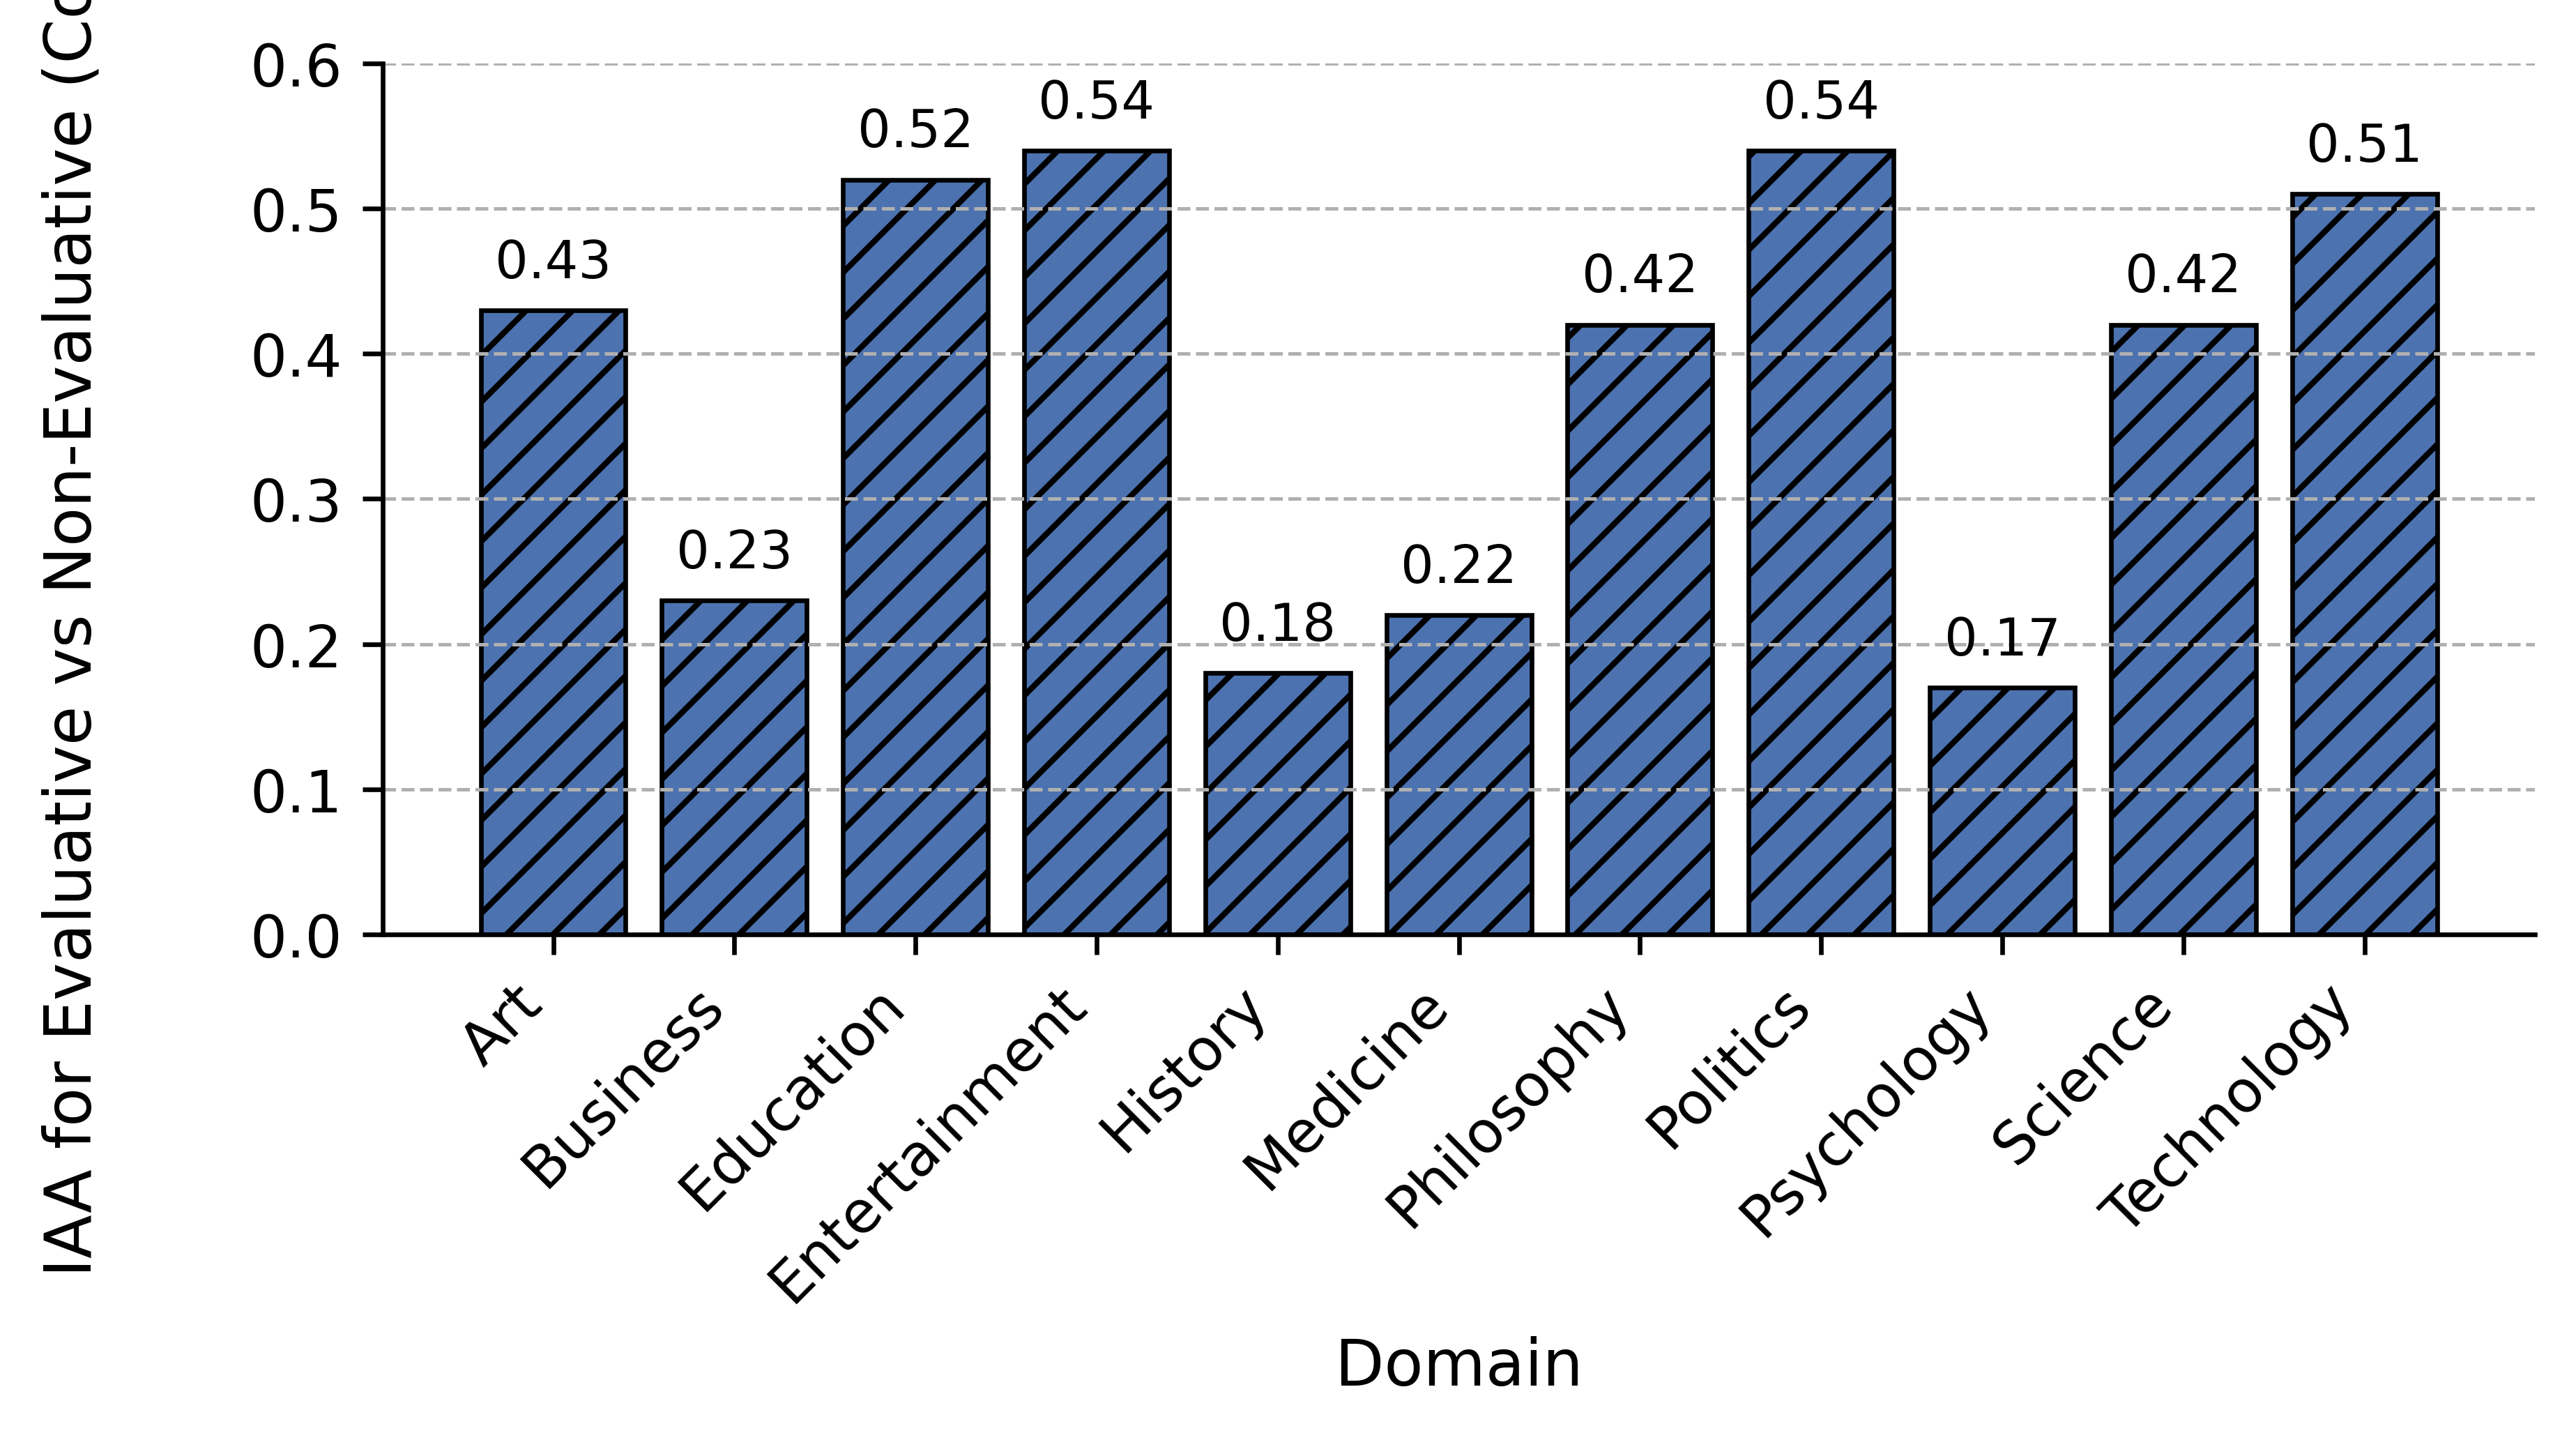

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl



# ---------------------------
# Data
# ---------------------------

data = {
    "Domain": [
        "Entertainment", "Politics", "Education", "Technology",
        "Art", "Philosophy", "Science", "Business",
        "Medicine", "History", "Psychology"
    ],
    "Cohen_kappa": [
        0.54, 0.54, 0.52, 0.51,
        0.43, 0.42, 0.42, 0.23,
        0.22, 0.18, 0.17
    ]
}

df = pd.DataFrame(data)

# Keep alphabetical sorting (as requested in original code)
df = df.sort_values("Domain").reset_index(drop=True)

# ---------------------------
# Plot
# ---------------------------

fig, ax = plt.subplots(
    figsize=(FIG_WIDTH_CM / 2.54, FIG_HEIGHT_CM / 2.54),
    dpi=600
)

bars = ax.bar(
    df["Domain"],
    df["Cohen_kappa"],
    color="#4C72B0",        # same seaborn deep blue
    edgecolor="black",      # improves grayscale clarity
    linewidth=0.8,
    hatch="///"             # add pattern for accessibility
)

# Value labels
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.015,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )

ax.set_xlabel("Domain")
ax.set_ylabel("IAA for Evaluative vs Non-Evaluative (Cohen’s κ)",labelpad=25 )  # increase this if still clipped)

ax.set_ylim(0, 0.6)

plt.xticks(rotation=45, ha="right")

# Clean academic style
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="y", linestyle="--", linewidth=0.6)

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-2.pdf", bbox_inches="tight")      # vector (recommended)
plt.savefig("Fig-2.png", dpi=600, bbox_inches="tight")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# ---------------------------
# Accessibility & Figure Setup
# ---------------------------

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 10,
    "axes.labelsize": 11,
    "legend.fontsize": 9
})

# ---------------------------
# Data Preparation (unchanged logic)
# ---------------------------

data = {
    "Domain": ["Pol2", "Psy5", "Sci7", "Bus11", "Edu2", "Ent8", "His5", "Med15",
               "Phi3", "Tech10", "Art5", "Med9", "Pol9", "Edu6", "Bus14",
               "Ent5", "His13", "Phi8", "Psy8", "Sci10"],
    "Affect": [0.56, 0.34, 0.034, 0.488, 0.449, 0.379, -0.033, 0.256, 0.123, 0.032,
               0.184, -0.153, 0.289, 0.236, 0.293, 0.695, -0.047, 0.473, -0.156, 0.466],
    "Judgement": [0.56, -0.018, 0.157, 0.247, 0.478, 0.140, -0.348, 0.252, 0.208, 0.102,
                  0.225, 0.157, 0.239, 0.353, 0.252, 0.539, 0.007, 0.324, -0.121, 0.182],
    "Appreciation": [0.47, 0.05, -0.104, 0.359, 0.289, 0.439, -0.337, 0.117, 0.302, 0.031,
                     0.423, 0.174, 0.009, 0.5, 0.201, 0.468, 0.295, 0.069, -0.057, 0.216],
}

df = pd.DataFrame(data)

df["DomainGroup"] = df["Domain"].str.extract(r"([A-Za-z]+)")

grouped = (
    df.groupby("DomainGroup", as_index=False)
      .mean(numeric_only=True)
      .sort_values("DomainGroup")
)

# ---------------------------
# Plot
# ---------------------------

domains = grouped["DomainGroup"]
x = np.arange(len(domains))
width = 0.23

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

# Seaborn deep palette colors (same style as earlier figures)
colors = ["#4C72B0", "#55A868", "#C44E52"]
hatches = ["///", "\\\\\\", "xxx"]

bars1 = ax.bar(x - width, grouped["Affect"], width,
               label="Affect",
               color=colors[0],
               edgecolor="black",
               hatch=hatches[0],
               linewidth=0.8)

bars2 = ax.bar(x, grouped["Judgement"], width,
               label="Judgement",
               color=colors[1],
               edgecolor="black",
               hatch=hatches[1],
               linewidth=0.8)

bars3 = ax.bar(x + width, grouped["Appreciation"], width,
               label="Appreciation",
               color=colors[2],
               edgecolor="black",
               hatch=hatches[2],
               linewidth=0.8)

# Zero reference line (important with negative α)
ax.axhline(0, color="black", linewidth=0.8)

# Value labels (handle negatives properly)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        offset = 0.015 if height >= 0 else -0.015
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + offset,
            f"{height:.2f}",
            ha="center",
            va="bottom" if height >= 0 else "top",
            fontsize=8,
            color="black"
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

ax.set_xticks(x)
ax.set_xticklabels(domains)
ax.set_ylabel("Krippendorff’s α")
ax.set_xlabel("Domain")

ax.legend(frameon=True, edgecolor="black")

# Clean academic style
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="y", linestyle="--", linewidth=0.6)

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-3.pdf", bbox_inches="tight")      # vector (recommended)
plt.savefig("Fig-3.png", dpi=600, bbox_inches="tight")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

# ---------------------------
# Accessibility & Figure Setup
# ---------------------------

FIG_WIDTH_IN = 6.26   # 15.9 cm
FIG_HEIGHT_IN = 4.0

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 10,
    "axes.labelsize": 11
})

# ---------------------------
# Data + Sorting (High → Low)
# ---------------------------

df = pd.DataFrame({
    "domain": alpha_by_domain["domain"],
    "value": alpha_by_domain["Evaluative"]
})

df = df.sort_values("value", ascending=False)

domains = df["domain"]
values = df["value"]

# Keep viridis color gradient
cmap = plt.cm.viridis
colors = cmap(np.linspace(0.2, 0.9, len(domains)))

# Hatch patterns (repeat if needed)
hatches = ["///", "\\\\\\", "xxx", "...", "+++", "---", "ooo", "***"]
hatches = (hatches * (len(domains) // len(hatches) + 1))[:len(domains)]

# ---------------------------
# Plot
# ---------------------------

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

bars = ax.bar(
    domains,
    values,
    color=colors,
    edgecolor="black",
    linewidth=0.8
)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Value labels
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )

ax.set_ylabel("Krippendorff’s α (Evaluative)")
ax.set_xlabel("Domain")

plt.xticks(rotation=35, ha="right")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="y", linestyle="--", linewidth=0.6)

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-4.pdf", bbox_inches="tight")
plt.savefig("Fig-4.png", dpi=600, bbox_inches="tight")

plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# ---------------------------
# Accessibility & Figure Setup
# ---------------------------

FIG_WIDTH_IN = 6.26   # 15.9 cm
FIG_HEIGHT_IN = 4.8

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
    "font.size": 10,
    "axes.labelsize": 11,
    "legend.fontsize": 9
})

# ---------------------------
# Data
# ---------------------------

domains = alpha_by_domain["domain"]
x = np.arange(len(domains))
width = 0.23

# ---------------------------
# Plot
# ---------------------------

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

colors = ["#4C72B0", "#55A868", "#C44E52"]  # seaborn deep
hatches = ["///", "\\\\\\", "xxx"]

bars1 = ax.bar(x - width, alpha_by_domain["Affect"], width,
               label="Affect",
               color=colors[0],
               edgecolor="black",
               hatch=hatches[0],
               linewidth=0.8)

bars2 = ax.bar(x, alpha_by_domain["Judgement"], width,
               label="Judgement",
               color=colors[1],
               edgecolor="black",
               hatch=hatches[1],
               linewidth=0.8)

bars3 = ax.bar(x + width, alpha_by_domain["Appreciation"], width,
               label="Appreciation",
               color=colors[2],
               edgecolor="black",
               hatch=hatches[2],
               linewidth=0.8)

# Zero reference line (important for α)
ax.axhline(0, color="black", linewidth=0.8)

# ---------------------------
# Value Labels (after bars!)
# ---------------------------

def add_value_labels(bars, idx, base_offset=0.025):
    for bar in bars:
        val = bar.get_height()
        direction = 1 if val >= 0 else -1
        offset = direction * (base_offset + idx * 0.01)

        ax.text(
            bar.get_x() + bar.get_width() / 2,
            val + offset,
            f"{val:.2f}",
            ha="center",
            va="bottom" if val >= 0 else "top",
            fontsize=8,
            color="black"
        )

add_value_labels(bars1, idx=0.0)
add_value_labels(bars2, idx=-1.5)
add_value_labels(bars3, idx=0.5)

# ---------------------------
# Formatting
# ---------------------------

ax.set_xticks(x)
ax.set_xticklabels(domains, rotation=35, ha="right")
ax.set_ylabel("Krippendorff’s α")
ax.set_xlabel("Domain")

ax.legend(frameon=True, edgecolor="black")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="y", linestyle="--", linewidth=0.6)

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-5.pdf", bbox_inches="tight")      # vector (recommended)
plt.savefig("Fig-5.png", dpi=600, bbox_inches="tight")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ---------------------------
# Accessibility & Figure Setup
# ---------------------------

# A4 text width = 15.9 cm = 6.26 inches
FIG_WIDTH_IN = 6.26
FIG_HEIGHT_IN = 4.2

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 10,
    "axes.labelsize": 11,
    "legend.fontsize": 9
})

# ---------------------------
# Data
# ---------------------------

models = ["Qwen3-30B", "Llama-3.3-70B", "Mistral-Large"]

acc = np.array([0.6808035714, 0.6517857143, 0.6607142857])
precision_pos = np.array([0.83, 0.89, 0.90])
recall_pos    = np.array([0.60, 0.48, 0.49])
f1_pos        = np.array([0.69, 0.62, 0.63])

metrics_names = ["Accuracy", "Precision (eval)", "Recall (eval)", "F1 (eval)"]
metrics_matrix = np.vstack([acc, precision_pos, recall_pos, f1_pos])

n_metrics, n_models = metrics_matrix.shape
x = np.arange(n_metrics)
width = 0.20

# ---------------------------
# Plot
# ---------------------------

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

# Use original seaborn deep palette colors
colors = ["#4C72B0", "#55A868", "#C44E52"]

# Add patterns for accessibility
hatches = ["///", "\\\\\\", "xxx"]

for i in range(n_models):
    ax.bar(
        x + (i - 1)*width,
        metrics_matrix[:, i],
        width=width,
        label=models[i],
        color=colors[i],         # original colors preserved
        edgecolor="black",       # improves grayscale readability
        hatch=hatches[i],
        linewidth=0.8
    )

ax.set_ylim(0, 1.0)
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, ha="center")
ax.set_ylabel("Score")

ax.legend(loc="lower right", frameon=True, edgecolor="black")
ax.grid(axis="y", linestyle="--", linewidth=0.6)

# Annotate values (contrast-safe)
for i in range(n_metrics):
    for j in range(n_models):
        val = metrics_matrix[i, j]
        xpos = x[i] + (j - 1)*width
        ax.text(
            xpos,
            val + 0.02,
            f"{val:.2f}",
            ha="center",
            va="bottom",
            fontsize=9,
            color="black"
        )

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-6.pdf", bbox_inches="tight")      # vector (recommended)
plt.savefig("Fig-6.png", dpi=600, bbox_inches="tight")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ---------------------------
# Accessibility & Figure Setup
# ---------------------------

FIG_WIDTH_IN = 6.26   # 15.9 cm (A4 text width)
FIG_HEIGHT_IN = 4.2

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 10,
    "axes.labelsize": 11,
    "legend.fontsize": 9
})

# ---------------------------
# Data
# ---------------------------

models = ["Qwen3-30B", "Llama-3.3-70B", "Mistral-Large"]
labels = ["Affect", "Judgement", "Appreciation"]

f1_scores = {
    "Qwen3-30B": [0.74, 0.32, 0.49],
    "Llama-3.3-70B": [0.73, 0.26, 0.44],
    "Mistral-Large": [0.74, 0.32, 0.42],
}

x = np.arange(len(labels))
width = 0.22

# ---------------------------
# Plot
# ---------------------------

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

colors = ["#4C72B0", "#55A868", "#C44E52"]
hatches = ["///", "\\\\\\", "xxx"]

for i, model in enumerate(models):
    bars = ax.bar(
        x + (i - 1) * width,
        f1_scores[model],
        width,
        label=model,
        color=colors[i],
        edgecolor="black",
        hatch=hatches[i],
        linewidth=0.8
    )

    # Value labels
    for j, val in enumerate(f1_scores[model]):
        ax.text(
            x[j] + (i - 1) * width,
            val + 0.02,
            f"{val:.2f}",
            ha="center",
            va="bottom",
            fontsize=8,
            color="black"
        )

ax.set_ylim(0, 1)
ax.set_ylabel("F1-score")
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(frameon=True, edgecolor="black")
ax.grid(axis="y", linestyle="--", linewidth=0.6)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-7.pdf", bbox_inches="tight")     # vector (best for thesis)
plt.savefig("Fig-7.png", dpi=600, bbox_inches="tight")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exact data from the figure
data = np.array([
    [0.349, 0.399, 0.228, 0.334],  # Qwen
    [0.289, 0.471, 0.230, 0.330],  # Llama
    [0.307, 0.367, 0.326, 0.295]   # Mistral
])

models = ["Qwen", "Llama", "Mistral"]
categories = ["Evaluative", "Affect", "Judgement", "Appreciation"]

# Create figure
plt.figure()

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

# Heatmap
im = plt.imshow(data)

# Colorbar
plt.colorbar(im)

# Axis ticks
plt.xticks(np.arange(len(categories)), categories, rotation=45)
plt.yticks(np.arange(len(models)), models)
# Add cell annotations
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, f"{data[i, j]:.3f}",
                 ha="center", va="center",color = "white")

# Title
#plt.title("Model Scores by Category")

#right side y label
plt.ylabel("Score")
plt.gca().yaxis.set_label_position("right")
#plt.gca().yaxis.tick_right()   # optional: move ticks to the right too


plt.tight_layout()



plt.savefig("Fig-8.pdf", bbox_inches="tight")
plt.savefig("Fig-8.png", dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ---------------------------
# Accessibility & Figure Setup
# ---------------------------

FIG_WIDTH_IN = 6.26   # 15.9 cm (A4 text width)
FIG_HEIGHT_IN = 4.2

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "text.color": "black",
    "font.size": 10,
    "axes.labelsize": 11,
    "legend.fontsize": 9
})

# ---------------------------
# Data (EXACT values preserved)
# ---------------------------

labels = ["Evaluative", "Affect", "Judgement", "Appreciation"]

before = np.array([0.69, 0.74, 0.32, 0.49])
after  = np.array([0.77, 0.17, 0.28, 0.47])

x = np.arange(len(labels))
width = 0.30

# ---------------------------
# Plot
# ---------------------------

fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))

bars1 = ax.bar(
    x - width/2,
    before,
    width,
    label="Before finetuning",
    color="#1f77b4",        # same blue
    edgecolor="black",
    hatch="///",
    linewidth=0.8
)

bars2 = ax.bar(
    x + width/2,
    after,
    width,
    label="After finetuning",
    color="#C44E52",
    #colors = ["#4C72B0", "#55A868", "#C44E52"]# same orange
    edgecolor="black",
    hatch="\\\\\\",
    linewidth=0.8
)

# Value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9,
            color="black"
        )

# Formatting
ax.set_ylim(0, 1.0)
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(frameon=True, edgecolor="black")
ax.grid(axis="y", linestyle="--", linewidth=0.6)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

# ---------------------------
# High-Quality Export
# ---------------------------

plt.savefig("Fig-9.pdf", bbox_inches="tight")
plt.savefig("Fig-9.png", dpi=600, bbox_inches="tight")

plt.show()
